
# Regression - Classification - ANN -  Manual_sklearn_keras- implementation


# We first begin with the classification of cities_USA dataset

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import warnings
datas=pd.read_csv("cities_USA.csv")
warnings.filterwarnings('ignore')
datas = datas.drop("col",axis=1)


labelencoder = LabelEncoder()


datas.iloc[:,2] = labelencoder.fit_transform(datas.iloc[:,2])

corr = datas.corr()
corr
inputs=datas.iloc[:,:-1].values
target=datas.iloc[:,-1].values
scaler = MinMaxScaler()
inputs=scaler.fit_transform(inputs)
inputs

array([[0.88108841, 0.        ],
       [0.88055904, 0.00594496],
       [0.88178569, 0.01279241],
       [0.88021494, 0.01415109],
       [0.86448345, 0.01547544],
       [0.88207643, 0.01798893],
       [0.86377452, 0.02396688],
       [0.86456117, 0.04846615],
       [0.85498638, 0.04866702],
       [0.7049403 , 0.04917107],
       [0.70536344, 0.05035016],
       [0.85455771, 0.05162711],
       [0.86481561, 0.06748655],
       [0.86448325, 0.0711972 ],
       [0.68792987, 0.07550291],
       [0.86600741, 0.09124038],
       [0.77330254, 0.09290447],
       [0.68101261, 0.0935747 ],
       [0.72912018, 0.09361724],
       [0.72600489, 0.0951411 ],
       [0.70422131, 0.10391652],
       [0.70152241, 0.10470923],
       [0.71539169, 0.10582105],
       [0.77353257, 0.10804416],
       [0.70175804, 0.10924092],
       [0.79927945, 0.11448004],
       [0.68793629, 0.11993111],
       [0.83993259, 0.12269252],
       [0.78217988, 0.12339899],
       [0.84681247, 0.12540482],
       [0.

In [2]:
import numpy as np

In [3]:
# linear regression function

def linear(input, weights, biases):
    return np.dot(input, weights.T) + biases

In [4]:
import numpy as np
def activation(x):
    return np.tanh(x)

In [5]:
def activation_deriv(x):
    return 1-np.tanh(x)**2

In [6]:
# hidden layer weights
from sklearn.metrics import accuracy_score
target=target.reshape(-1,1)

learning_rate=0.001
import numpy as np
hidden_layer_weights = np.array([
    [0.7, 0.2],    # unit 1
    [0.3, 0.4]  # unit 2
])
hidden_layer_biases = np.array([1. ,1.])

# initial output layer weights
output_weights = np.array([[1., 1.]])
output_biases = np.array([1.])

for i in range(10000):
    
    hidden_linout = linear(inputs, hidden_layer_weights, hidden_layer_biases)
    hidden_output = activation(hidden_linout)
    
    output_linout = linear(hidden_output, output_weights, output_biases)
    output_output = output_linout # no activation function on output layer

    predicted = output_output

    # derivative of mean squared error
    error = predicted - target

    # delta for the output layer (no activation on output layer)
    delta_output = error

    # output layer updates
    output_weights_update = delta_output.T.dot(hidden_output)
    output_biases_update = delta_output.sum(axis = 0)
    
    #print(delta_output.shape)
    #print(output_weights.shape)
    #print(activation_deriv(hidden_linout).shape)
        
    # push back the delta to the hidden layer
    delta_hidden = delta_output*output_weights*activation_deriv(hidden_linout)

    # hidden layer updates
    hidden_weights_update = delta_hidden.T.dot(inputs)
    hidden_biases_update = delta_hidden.sum(axis = 0)

    output_weights -= output_weights_update*learning_rate
    output_biases -= output_biases_update*learning_rate

    hidden_layer_weights -= hidden_weights_update*learning_rate
    hidden_layer_biases -= hidden_biases_update*learning_rate
 
predicted=(predicted>0.5).astype(int)

score1=accuracy_score(predicted,target)
print("The accuracy of our numpy model is:",score1)

The accuracy of our numpy model is: 0.7825


In [7]:
target

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
    

In [8]:
mse = np.mean((target - predicted)**2)
print('mean squared error')
print(mse)

mean squared error
0.2175


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs, target,test_size=0.2)

In [10]:
def rmse(predictions, targets):
    import numpy as np
    differences = predictions - targets      

    differences_squared = differences ** 2                    

    mean_of_differences_squared = differences_squared.mean()  

    rmse_val = np.sqrt(mean_of_differences_squared)           

    return rmse_val   


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

rmse_mlp=[] 
mae_mlp=[]
accuracy=[]

list_1 = [1,5,10,20,50]
    #if we use the sigmoid function as our  activation function, we do not have an efficient model.
    #the same for tanh
    #as learning rate i used the default value, and max_iter=700
    #if we choose as solver=lbfgs we take imbalanced results from negative to too good(75%)
for i in list_1:
    print("number of hidden layers:",i)
    regr = MLPClassifier(hidden_layer_sizes=i, activation='tanh', solver='lbfgs',alpha=0.01,learning_rate_init=0.001,max_iter=50000)
    regr.fit(X_train, y_train)
    scores = cross_val_score(regr, X_train, y_train, cv=5)
    accuracy.append(scores.mean())
    y_pr = regr.predict((X_test))
    error_rmse=rmse(y_pr, y_test)
    rmse_mlp.append(error_rmse)
    error_mae=mean_absolute_error(y_test, y_pr)
    mae_mlp.append(error_mae)

print(y_pr)
print("scores of cross validation: ",accuracy) 
print("accuracy of mlp classification",sum(accuracy)/len(accuracy))    
print("rmse for mlp classification:",sum(rmse_mlp) / len(rmse_mlp)) 
print("mae for mlp classification:",sum(mae_mlp) / len(mae_mlp))
score2=sum(accuracy)/len(accuracy)
    #y_predict = regr.predict(x_test)
    #score5 = metrics.r2_score(y_test,y_predict)
    #score5

number of hidden layers: 1
number of hidden layers: 5
number of hidden layers: 10
number of hidden layers: 20
number of hidden layers: 50
[0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1
 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 1 1 1 1 0 0]
scores of cross validation:  [0.778125, 0.85625, 0.9, 0.91875, 0.9125]
accuracy of mlp classification 0.8731249999999999
rmse for mlp classification: 0.685376247602783
mae for mlp classification: 0.22999999999999998


In [12]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [13]:
model = Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'adam',loss = 'mean_squared_error', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=150, batch_size=10, verbose=0)
predictions = model.predict(X_test)

In [14]:
predictions=(predictions>0.5).astype(int)

score3=accuracy_score(predictions,y_test)
print("The accuracy of our numpy model is:",score3)

The accuracy of our numpy model is: 0.7375


In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [17]:
score4=accuracy_score(y_test, y_pred)
print("Accuracy:",score4)

Accuracy: 0.8625


# We concluded that by applying all these different techiques the accuracies of our 4 models varied.First we built a numpy ann model using backpropagation.The accuracy that we took was close to 78% and if our prediction was higher than 0.5 we decided that our predicted value was 1 and respectively 0 if our predicted value was smaller or equal than 0.5.
# Moreover, using the sklearn library for our mlp classifier, we ended up that our average accuracy of our model was 87% with 5 fold cross validation and for 5 different sizes of hidden layers.
# Subsequently, we created a sequential model using keras and we got an accuracy of 74% with 2 hidden layers and 10 and 5 neurons respectively.
# And finally, by implementing decision trees classifier in our dataset, we observed that our accuracy was very high and it reached 86%.
# So mlp classifier gave the better performance out of 4 models.


# We continue by applying regression models on kc_house dataset.

In [18]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
#warnings.filterwarnings('ignore')
datas=pd.read_csv("kc_house_data.csv")

X = datas.drop("date",axis=1)
X = X.drop("price",axis=1)
X = X.drop("id",axis=1)
X = X.drop("zipcode",axis=1).values

y=datas.iloc[:,2].values
corr = datas.corr()
print(corr)
scaler = MinMaxScaler()
X=scaler.fit_transform(X)


                     id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016797  0.001286   0.005160    -0.012258 -0.132109   
price         -0.016797  1.000000  0.308338   0.525134     0.702044  0.089655   
bedrooms       0.001286  0.308338  1.000000   0.515884     0.576671  0.031703   
bathrooms      0.005160  0.525134  0.515884   1.000000     0.754665  0.087740   
sqft_living   -0.012258  0.702044  0.576671   0.754665     1.000000  0.172826   
sqft_lot      -0.132109  0.089655  0.031703   0.087740     0.172826  1.000000   
floors         0.018525  0.256786  0.175429   0.500653     0.353949 -0.005201   
waterfront    -0.002721  0.266331 -0.006582   0.063744     0.103818  0.021604   
view           0.011592  0.397346  0.079532   0.187737     0.284611  0.074710   
condition     -0.023783  0.036392  0.028472  -0.124982    -0.058753 -0.008958   
grade          0.008130  0.667463  0.356967   0.664983     0.762704  0.113621   
sqft_above    -0.010842  0.6

In [19]:
X.shape

(21613, 17)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

In [21]:
X_train.shape

(16209, 17)

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
    
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

rmse_mlp=[] 
mae_mlp=[]
accuracy=[]

list_1 = [1,5,10,20,50]
    #if we use the sigmoid function as our  activation function, we do not have an efficient model.
    #the same for tanh
    #as learning rate i used the default value, and max_iter=700
    #if we choose as solver=lbfgs we take imbalanced results from negative to too good(75%)
for i in list_1:
    print(i)
    regr = MLPRegressor(hidden_layer_sizes=i, activation='tanh', solver='lbfgs',alpha=0.01,learning_rate_init=0.001,max_iter=50000)
    regr.fit(X_train, y_train)
    scores = cross_val_score(regr, X_train, y_train, cv=5)
    accuracy.append(scores.mean())
    y_pr = regr.predict((X_test))
    error_rmse=rmse(y_pr, y_test)
    rmse_mlp.append(error_rmse)
    error_mae=mean_absolute_error(y_test, y_pr)
    mae_mlp.append(error_mae)


print("scores of cross validation: ",accuracy) 
print("accuracy of mlp regression",sum(accuracy)/len(accuracy))    
print("rmse for mlp regression:",sum(rmse_mlp) / len(rmse_mlp)) 
print("mae for mlp regression:",sum(mae_mlp) / len(mae_mlp))     
#y_predict = regr.predict(x_test)
#score5 = metrics.r2_score(y_test,y_predict)
#score5
accuracy1=sum(accuracy)/len(accuracy)

1
5
10
20
50
scores of cross validation:  [-0.0002590466551776416, 0.06724656973594925, 8.119173638243549e-05, -0.00025902284277674604, 0.1253843719821473]
accuracy of mlp regression 0.03843881279130492
rmse for mlp regression: 374419.63081241504
mae for mlp regression: 231670.7351723432


In [23]:
accuracy1=sum(accuracy)/len(accuracy)
accuracy1

0.03843881279130492

In [24]:
from sklearn.tree import DecisionTreeRegressor
dtree_reg = DecisionTreeRegressor(random_state=0)
dtree_reg.fit(X_train,y_train)
y_pr_dtree = dtree_reg.predict((X_test))
#calculation of prediction score
from sklearn import metrics
accuracy2 = metrics.r2_score(y_test,y_pr_dtree)
accuracy2

0.7479597557649146

In [25]:
from tensorflow.keras.models import Sequential
model = Sequential()

model.add(Dense(10, activation = 'relu', input_dim = 17))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
model.fit(X_train, y_train, batch_size = 35, epochs = 150)
y_pred = model.predict(X_test)
accuracy3 = metrics.r2_score(y_test,y_pred)
print("Accuracy of Keras Model:",accuracy3)

Epoch 1/150
464/464 [==============================] - 2s 2ms/step - loss: 424381882702.7269
Epoch 2/150
464/464 [==============================] - 1s 2ms/step - loss: 424931051550.8301
Epoch 3/150
464/464 [==============================] - 1s 1ms/step - loss: 429047447058.7183
Epoch 4/150
464/464 [==============================] - 1s 1ms/step - loss: 419608406346.3226
Epoch 5/150
464/464 [==============================] - 1s 1ms/step - loss: 418657445513.6344
Epoch 6/150
464/464 [==============================] - 1s 1ms/step - loss: 425712381537.9957
Epoch 7/150
464/464 [==============================] - 1s 1ms/step - loss: 408311521790.8989
Epoch 8/150
464/464 [==============================] - 1s 1ms/step - loss: 387700985882.4258
Epoch 9/150
464/464 [==============================] - 1s 1ms/step - loss: 398704834846.2795
Epoch 10/150
464/464 [==============================] - 1s 1ms/step - loss: 367547113806.7269
Epoch 11/150
464/464 [==============================] - 1s 1ms/step -

# We continue our analysis by implementing 3 different regression techniques on our second dataset.First we used sklearn in order to apply mlp regressor to our dataset.We took a really low average accuracy close to 3.8% with 5 fold cross validation and for 5 different sizes of hidden layers.
# Furthermore,from sklearn library, we used decision tree regressor and we ended up with an acceptable accuracy of 75%.
# And finally our keras implementation gave 60% accuracy with 2 hidden layers with 10 and 5 neurons respectively.
# So, we observe that decision tree regressor gave better accuracy than the other 2 models.

In [26]:
scores = [score1,score2,score3,score4]
scores

[0.7825, 0.8731249999999999, 0.7375, 0.8625]

No handles with labels found to put in legend.


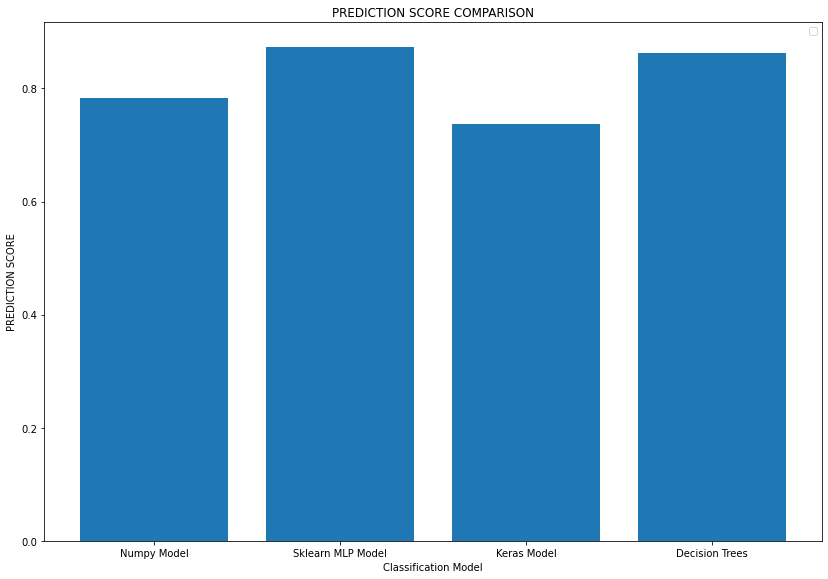

In [27]:
#comparison diagram between the score of each method according to the regression applied.
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1.8,1.8])
algorithms = ['Numpy Model', 'Sklearn MLP Model', 'Keras Model','Decision Trees']
total_scores= scores
ax.bar(algorithms,total_scores)
plt.title('PREDICTION SCORE COMPARISON')
plt.legend()
plt.xlabel("Classification Model")
plt.ylabel("PREDICTION SCORE")
plt.show()

In [28]:
accuracy = [accuracy1,accuracy2,accuracy3]
accuracy

[0.03843881279130492, 0.7479597557649146, 0.6075648994383837]

No handles with labels found to put in legend.


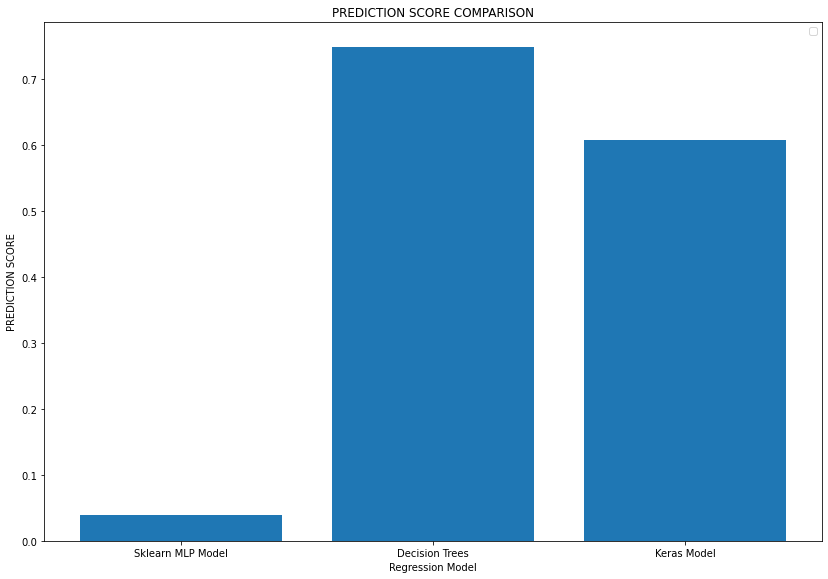

In [29]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1.8,1.8])
algorithms = ['Sklearn MLP Model','Decision Trees','Keras Model']
total_scores= accuracy
ax.bar(algorithms,total_scores)
plt.title('PREDICTION SCORE COMPARISON')
plt.legend()
plt.xlabel("Regression Model")
plt.ylabel("PREDICTION SCORE")
plt.show()